David Lattimer  
12/16/2020  
DSC 540  
# Week 3-4 Activities

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series1 = pd.Series([7.3, -2.5, 3.4, 1.5],
                 index=['a', 'c', 'd', 'e'])
series2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
                   index=['a', 'c', 'e', 'f', 'g'])

In [3]:
#Adding no fill
series1 + series2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [4]:
#Subtracting no fill
series1 - series2

a    9.4
c   -6.1
d    NaN
e    3.0
f    NaN
g    NaN
dtype: float64

In [5]:
#Adding with 0 fill
series1.add(series2, fill_value=0)

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

In [6]:
#Subtracting with 0 fill
series2.subtract(series1, fill_value=0)

a   -9.4
c    6.1
d   -3.4
e   -3.0
f    4.0
g    3.1
dtype: float64

# Activity 5: Generating Statistics from a CSV File

* Load the necessary libraries (Done above)

* Read in the Boston housing dataset



In [7]:
#Loading in the data
df = pd.read_csv(r'Boston_housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


* Check the first 10 records

In [8]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


* Find the total number of records

In [9]:
#Number of rows in our dataframe:
print('Total Number of records: ' + str(df.shape[0]))

Total Number of records: 506


* Create a smaller DataFrame with columns that do not include **CHAS, NOX, B,** and **LSTAT**.

In [10]:
# I could drop the columns we won't use, but I would rather make a new DF to work with in case 
# we need the deleted columns later
small_df = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'PRICE']]
small_df

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0


* Check the last 7 records of the new DataFrame you just created

In [11]:
small_df.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


* Plot the histograms of all the variables (columns) in the new DataFrame

Text(0.5, 0, 'Crime Rate per Capita')

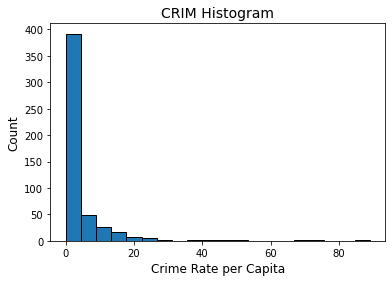

In [12]:
#CRIM Histogram:
plt.hist(small_df.CRIM, edgecolor='k', bins=20)
plt.title('CRIM Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Crime Rate per Capita', fontsize=12)

Text(0.5, 0, 'Zoned Neighborhoods')

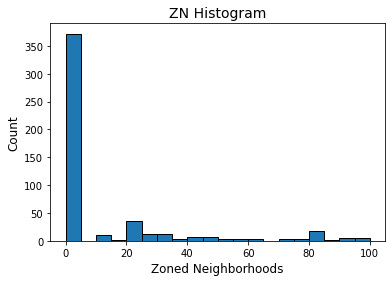

In [13]:
#ZN Histogram:
plt.hist(small_df.ZN, edgecolor='k', bins=20)
plt.title('ZN Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Zoned Neighborhoods', fontsize=12)

Text(0.5, 0, 'Non-retail business acres')

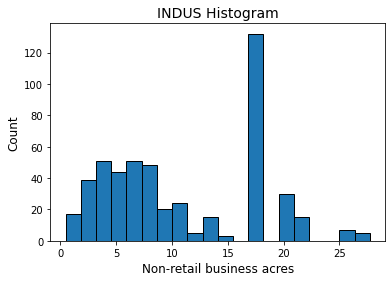

In [14]:
#INDUS Histogram:
plt.hist(small_df.INDUS, edgecolor='k', bins=20)
plt.title('INDUS Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Non-retail business acres', fontsize=12)

Text(0.5, 0, 'Number of Rooms per Dwelling')

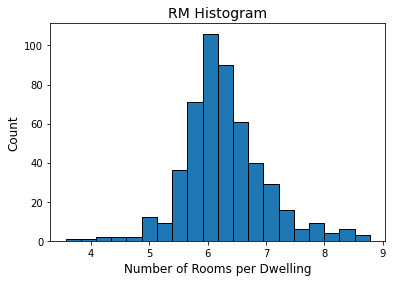

In [15]:
#RM Histogram:
plt.hist(small_df.RM, edgecolor='k', bins=20)
plt.title('RM Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of Rooms per Dwelling', fontsize=12)

Text(0.5, 0, 'Proportion of Units Built Prior to 1940')

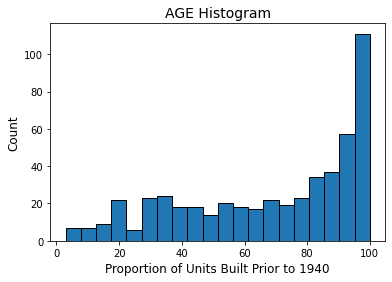

In [16]:
#AGE Histogram:
plt.hist(small_df.AGE, edgecolor='k', bins=20)
plt.title('AGE Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Proportion of Units Built Prior to 1940', fontsize=12)

Text(0.5, 0, 'Weighted Distance to Employment Centres')

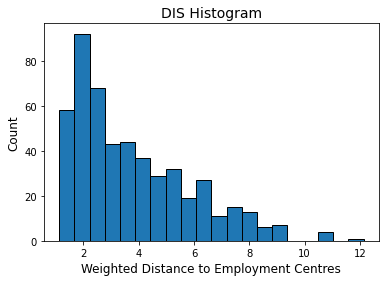

In [17]:
#DIS Histogram:
plt.hist(small_df.DIS, edgecolor='k', bins=20)
plt.title('DIS Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Weighted Distance to Employment Centres', fontsize=12)

Text(0.5, 0, 'Accessibility to Radial Highways')

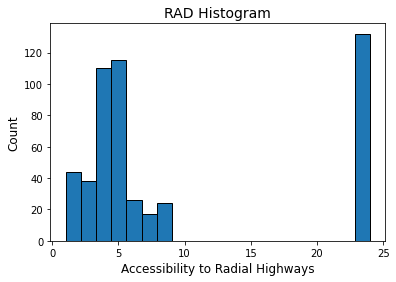

In [18]:
#RAD Histogram:
plt.hist(small_df.RAD, edgecolor='k', bins=20)
plt.title('RAD Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Accessibility to Radial Highways', fontsize=12)

Text(0.5, 0, 'Full-value Property-tax Rate per $10,000')

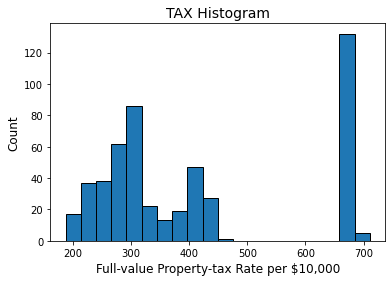

In [19]:
#TAX Histogram:
plt.hist(small_df.TAX, edgecolor='k', bins=20)
plt.title('TAX Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Full-value Property-tax Rate per $10,000', fontsize=12)

Text(0.5, 0, 'Pupil-Teacher Ratio')

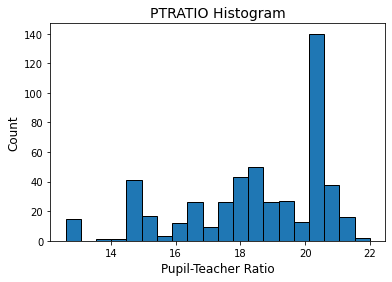

In [20]:
#PTRATIO Histogram:
plt.hist(small_df.PTRATIO, edgecolor='k', bins=20)
plt.title('PTRATIO Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Pupil-Teacher Ratio', fontsize=12)

Text(0.5, 0, 'Price')

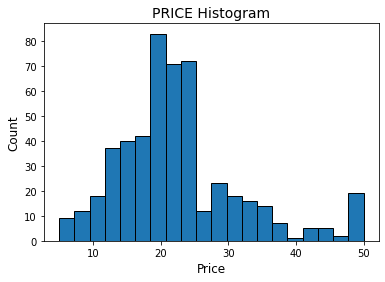

In [21]:
#PRICE Histogram:
plt.hist(small_df.PRICE, edgecolor='k', bins=20)
plt.title('PRICE Histogram', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Price', fontsize=12)

* Plot them all at once using a **for** loop. Try to add a unique title to a plot

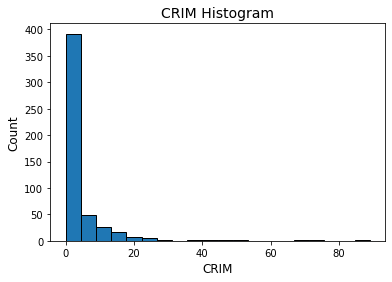

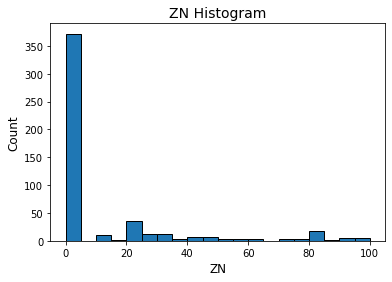

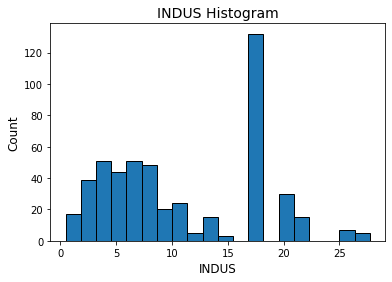

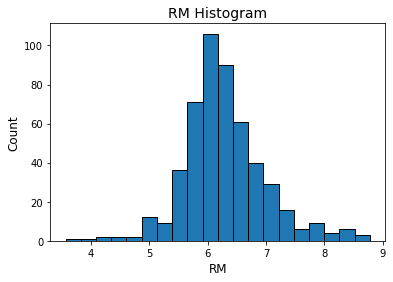

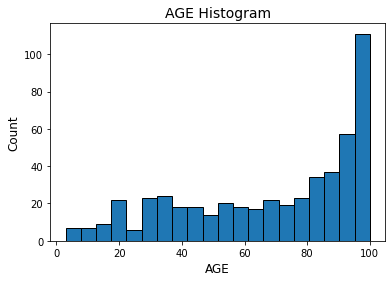

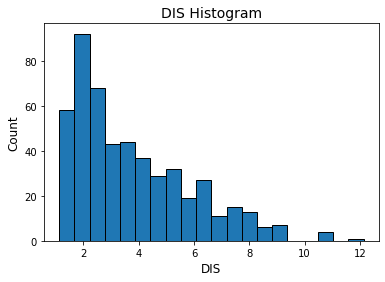

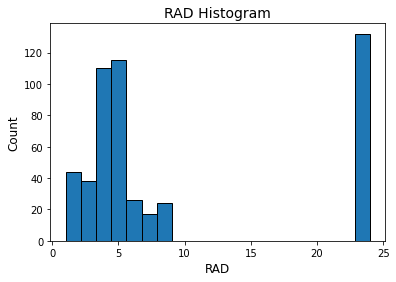

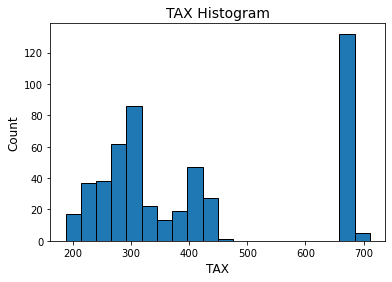

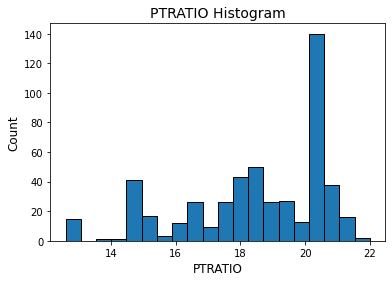

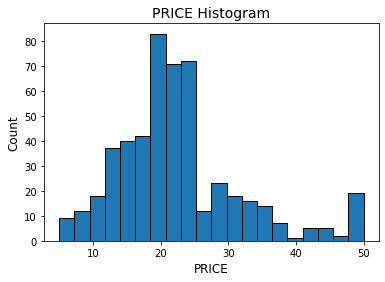

In [22]:
for column in small_df.columns:
    plt.title(column + ' Histogram', fontsize=14)
    plt.hist(small_df[column], bins=20, edgecolor='k')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.show()


* Create a scatter plot of crime rate versus price.

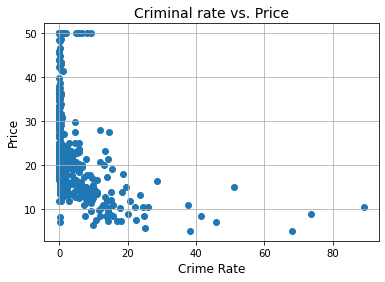

In [23]:
plt.scatter(small_df.CRIM, small_df.PRICE)
plt.title('Criminal rate vs. Price', fontsize=14)
plt.xlabel('Crime Rate', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)

* Plot using **log10(crime)** versus **price**

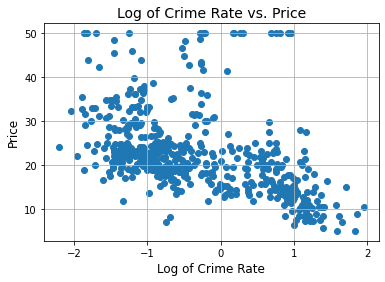

In [24]:
plt.scatter(np.log10(small_df.CRIM), small_df.PRICE)
plt.title('Log of Crime Rate vs. Price', fontsize=14)
plt.xlabel('Log of Crime Rate', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)

* Calculate some useful statistics, such as mean rooms per dwelling, median age, mean distances to five Boston employment centers, and the percentage of houses with a low price (<$20,000)

In [25]:
#Mean rooms per dwelling
print('Mean rooms per dwelling: ' + str(small_df.RM.mean()))

Mean rooms per dwelling: 6.284634387351788


In [26]:
#Median age
print('Median age: ' + str(small_df.AGE.median()))

Median age: 77.5


In [27]:
#Mean distances to five Boston employment centers
print('Mean distance to five Boston employment centers: ' + str(small_df.DIS.mean()))

Mean distance to five Boston employment centers: 3.795042687747034


In [28]:
#Percentage of houses with a low price (<$20,000)
low_price = small_df.PRICE < 20

In [29]:
percent = low_price.sum()/low_price.count()
print('Percent of houses below $20,000: ' + "{:.2%}".format(percent))

Percent of houses below $20,000: 41.50%


# Activity 6: Working with the Adult Income Dataset (UCI)

* Load the necessary libraries
* Read the adult income dataset from the following URL:

In [30]:
adult_income = pd.read_csv('adult-income.csv')

In [31]:
adult_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


* Create a script that will read a text file line by line

In [32]:
with open('adult-income.csv', 'r') as f:
    lines = f.readlines()
lines

['age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income\n',
 '39, State-gov,77516, Bachelors,13, Never-married, Adm-clerical, Not-in-family, Male,2174,0,40, United-States, <=50K\n',
 '50, Self-emp-not-inc,83311, Bachelors,13, Married-civ-spouse, Exec-managerial, Husband, Male,0,0,13, United-States, <=50K\n',
 '38, Private,215646, HS-grad,9, Divorced, Handlers-cleaners, Not-in-family, Male,0,0,40, United-States, <=50K\n',
 '53, Private,234721, 11th,7, Married-civ-spouse, Handlers-cleaners, Husband, Male,0,0,40, United-States, <=50K\n',
 '28, Private,338409, Bachelors,13, Married-civ-spouse, Prof-specialty, Wife, Female,0,0,40, Cuba, <=50K\n',
 '37, Private,284582, Masters,14, Married-civ-spouse, Exec-managerial, Wife, Female,0,0,40, United-States, <=50K\n',
 '49, Private,160187, 9th,5, Married-spouse-absent, Other-service, Not-in-family, Female,0,0,16, Jamaica, <=50K\n',
 '52, Self-emp-not-i

* Add a name of **Income** for the response variable to the dataset

In [33]:
#I did it already. I actually just added the names of the columns in the notepad of the CSV and then brought it in
#Not sure if I should have, but the files in the book are a pain to get the right ones and did what I could.

* Find the missing values

In [34]:
adult_income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

* Create a DataFrame with only age, education, and occupation by using subsetting

In [35]:
subset1 = adult_income[['age', 'education', 'occupation']]

In [36]:
subset1

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
...,...,...,...
32556,27,Assoc-acdm,Tech-support
32557,40,HS-grad,Machine-op-inspct
32558,58,HS-grad,Adm-clerical
32559,22,HS-grad,Adm-clerical


* Plot a histogram of age with a bin size of 20.

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

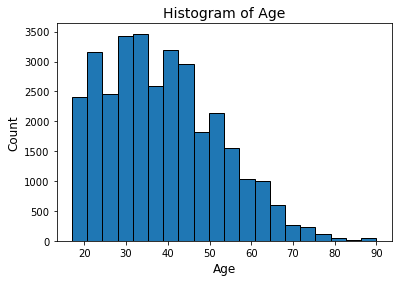

In [37]:
plt.hist(subset1.age, bins=20, edgecolor='k')
plt.title('Histogram of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

* Create a function to strip the whitespace characters

In [38]:
def strip_whitespace(s):
    return s.strip()

* Use the **apply** method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column and drop the new column

In [39]:
#Strip whitespace into new column
subset1['education_stripped'] = subset1.education.apply(strip_whitespace)
#Set old column to be new column
subset1.education = subset1.education_stripped
#Delete new column
subset1.drop(['education_stripped'], axis=1, inplace=True)


subset1['occupation_stripped'] = subset1.occupation.apply(strip_whitespace)
subset1.occupation = subset1.occupation_stripped
subset1.drop(['occupation_stripped'], axis=1, inplace=True)

<ipython-input-39-ec56bf39e046>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1['education_stripped'] = subset1.education.apply(strip_whitespace)
C:\Users\David\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\David\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [40]:
subset1

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
...,...,...,...
32556,27,Assoc-acdm,Tech-support
32557,40,HS-grad,Machine-op-inspct
32558,58,HS-grad,Adm-clerical
32559,22,HS-grad,Adm-clerical


* Find the number of people who are aged between 30 and 50

In [41]:
subset1[(subset1.age > 30) & (subset1.age < 50)]

,age,education,occupation
0,39,Bachelors,Adm-clerical
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service
8,31,Masters,Prof-specialty
...,...,...,...
32550,43,Some-college,Craft-repair
32551,32,10th,Handlers-cleaners
32552,43,Assoc-voc,Sales
32553,32,Masters,Tech-support


* Group the records based on age and education to find out how the mean age is distributed

In [42]:
grouped_df = subset1.groupby(['occupation'])

In [43]:
df_described = grouped_df.describe()
df_described

age                                                    
                    count       mean        std   min   25%   50%   75%   max
occupation                                                                   
?                  1843.0  40.882800  20.336350  17.0  21.0  35.0  61.0  90.0
Adm-clerical       3770.0  36.964456  13.362998  17.0  26.0  35.0  46.0  90.0
Armed-Forces          9.0  30.222222   8.089774  23.0  24.0  29.0  34.0  46.0
Craft-repair       4099.0  39.031471  11.606436  17.0  30.0  38.0  47.0  90.0
Exec-managerial    4066.0  42.169208  11.974548  17.0  33.0  41.0  50.0  90.0
Farming-fishing     994.0  41.211268  15.070283  17.0  29.0  39.0  52.0  90.0
Handlers-cleaners  1370.0  32.165693  12.372635  17.0  23.0  29.0  39.0  90.0
Machine-op-inspct  2002.0  37.715285  12.068266  17.0  28.0  36.0  46.0  90.0
Other-service      3295.0  34.949621  14.521508  17.0  22.0  32.0  45.0  90.0
Priv-house-serv     149.0  41.724832  18.633688  17.0  24.0  40.0  57.0  81.0
Prof-specialty     4140.0  40.517633  12.016676  17.0  31.0  40.0  48.0  90.0
Protective-serv     649.0  38.953775  12.822062  17.0  29.0  36.0  47.0  90.0
Sales              3650.0  37.353973  14.186352  17.0  25.0  35.0  47.0  90.0
Tech-support        928.0  37.022629  11.316594  17.0  28.0  36.0  44.0  73.0
Transport-moving   1597.0  40.197871  12.450792  17.0  30.0  39.0  49.0  90.0

* Group by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile.

In [44]:
age = df_described.age['mean'].max()
name = df_described.index[4]
print('The oldest workers on average are {} with a mean age of: {}'.format(name, age))

The oldest workers on average are Exec-managerial with a mean age of: 42.16920806689621


In [45]:
percentile = df_described.age['max']-df_described.age['75%']
gap = percentile.max()
gap_name = percentile.index[6]

print('The profession with the largest workforce above 75% is {} with {}% of the workforce'.format(gap_name, gap))

The profession with the largest workforce above 75% is Handlers-cleaners with 51.0% of the workforce


* Use subset and groupby to find outliers

The only real outliers we might have are from groups that are underrepresented (armed forces), or if we are just looking into ages and occupation, then using the ? occupation isn't all that helpful for us. Obviously if we are using the entire dataset, we can keep the ?s there and still learn stuff from the information we have, but in this case it isn't all that useful. The armed forces only having 9 entries is unfortunate because you would assume the age group there would lean a lot younger than a lot of these categories, but because we only have 9 entries, it is hard to use it really.

* Plot the values on a bar chart

In [46]:
occupation_stats = subset1.groupby('occupation').describe()['age']

Text(0.5, 0, 'Count')

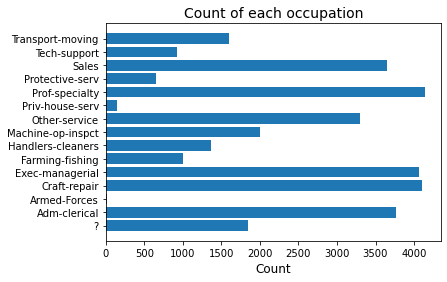

In [47]:
plt.barh(y=occupation_stats.index, width=occupation_stats['count'])
plt.title('Count of each occupation', fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=12)

* Merge the data using common keys

In [48]:
df1 = adult_income[['age', 'occupation', 'education']].sample(7, random_state=21)

In [49]:
df1

,age,occupation,education
15606,30,Machine-op-inspct,HS-grad
19060,58,Sales,HS-grad
23806,42,Exec-managerial,Assoc-voc
32412,61,Other-service,Some-college
17101,45,Tech-support,Assoc-acdm
30623,72,?,Some-college
19014,25,Prof-specialty,Bachelors


In [50]:
df2 = adult_income[['workclass', 'occupation', 'relationship']].sample(7, random_state=21)

In [51]:
df2

,workclass,occupation,relationship
15606,Private,Machine-op-inspct,Husband
19060,Private,Sales,Not-in-family
23806,Self-emp-not-inc,Exec-managerial,Husband
32412,Private,Other-service,Not-in-family
17101,Local-gov,Tech-support,Own-child
30623,?,?,Husband
19014,Private,Prof-specialty,Husband


In [52]:
merging = pd.merge(df1, df2, on='occupation', how='inner').drop_duplicates()

In [53]:
merging

,age,occupation,education,workclass,relationship
0,30,Machine-op-inspct,HS-grad,Private,Husband
1,58,Sales,HS-grad,Private,Not-in-family
2,42,Exec-managerial,Assoc-voc,Self-emp-not-inc,Husband
3,61,Other-service,Some-college,Private,Not-in-family
4,45,Tech-support,Assoc-acdm,Local-gov,Own-child
5,72,?,Some-college,?,Husband
6,25,Prof-specialty,Bachelors,Private,Husband
